# Load the Dataset into 2 Dataframes


## Article DF
| Article | Category | linkTargets | Article_id | distances | plain_text | 
| ------- | ---------- | ------------ | ---------- | ---------- | ---------- |
| string | string | list[string] | string | dict[string, int] | string | 


## Path DF
| Path | uid | start_article | target_article | length | finished | distance | rating | reason of fail |
| ------- | ---------- | ------------ | ---------- | ---------- | ---------- | ----- | ---- | ------ |
| list[string] | string | string | string | int  | boolean | int | int | string |

In [ ]:
%pip install -r requirements.txt

In [31]:
from src.load_data import *
import pandas as pd 

In [32]:
# create the directory `Data/dataframes`
import os
if not os.path.exists('Data/dataframes'):
    os.makedirs('Data/dataframes')

In [33]:
articles = load_articles_into_df()
categories = load_categories()
links = load_links()
paths_finished = load_paths_finished()
paths_unfinished = load_paths_unfinished()
distances = load_distances()

In [5]:
distances

KeyboardInterrupt: 

In [34]:
# Print the shapes of articles, categories, links
print("Articles shape: ", articles.shape)
print("Categories shape: ", categories.shape)
print("Links shape: ", links.shape)

Articles shape:  (4604, 1)
Categories shape:  (4598, 2)
Links shape:  (4587, 2)


In [52]:
# List the articles that are in articles and not in categories
articles_not_in_categories = articles[~articles['article'].isin(categories['article'])]
articles_not_in_categories

,article,article_unrendered_unicode
1210,Directdebit,Directdebit
1231,Donation,Donation
1600,Friend_Directdebit,Friend_Directdebit
3253,Pikachu,Pikachu
3849,Sponsorship_Directdebit,Sponsorship_Directdebit
4545,Wowpurchase,Wowpurchase


In [53]:
# List the articles that are in articles and not in link sources
articles_not_in_source_links = articles[~articles['article'].isin(links['linkSource'])]
articles_not_in_source_links


,article,article_unrendered_unicode
441,Badugi,Badugi
970,Color_Graphics_Adapter,Color_Graphics_Adapter
1210,Directdebit,Directdebit
1231,Donation,Donation
1237,Douglas_DC-4,Douglas_DC-4
1257,Duchenne_muscular_dystrophy,Duchenne_muscular_dystrophy
2351,Klinefelter's_syndrome,Klinefelter%27s_syndrome
2530,Local_community,Local_community
2543,Lone_Wolf_(gamebooks),Lone_Wolf_%28gamebooks%29
3108,Osteomalacia,Osteomalacia


In [54]:
# List the articles that are in articles and not in link targets
articles_not_in_target_links = articles[~articles['article'].isin(links['linkTarget'].explode())]
articles_not_in_target_links

,article,article_unrendered_unicode
0,Áedán_mac_Gabráin,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
1,Åland,%C3%85land
2,Édouard_Manet,%C3%89douard_Manet
3,Éire,%C3%89ire
4,Óengus_I_of_the_Picts,%C3%93engus_I_of_the_Picts
...,...,...
4566,Yellowhammer,Yellowhammer
4575,Yotsuya_Kaidan,Yotsuya_Kaidan
4576,You're_Still_the_One,You%27re_Still_the_One
4580,"Yungay,_Peru",Yungay%2C_Peru


In [55]:

# | Article | Category | linkTargets | Article_id | distances | plain_text | 

article_dataframe = articles

artiles_unrendered_unicode = load_articles_into_df(do_decode=False)
# Add articles_unrendered_unicode to article_dataframe
article_dataframe['article_unrendered_unicode'] = artiles_unrendered_unicode['article']

# Merge the articles and categories dataframes
article_dataframe = pd.merge(article_dataframe, categories, on='article', how='left')

# Merge the article_dataframe and links dataframes
article_dataframe = pd.merge(article_dataframe, links, left_on='article', right_on='linkSource', how='left')

# Merge the article_dataframe by inserting dictionary into `distances` column` where distances is dict[article_name, dict]
article_dataframe['distances'] = article_dataframe['article'].map(distances)

# for each row in article_dataframe, 
# load the plain_text from the file `Data/plaintext_articles/{article_name}.txt`
def load_plain_text(article_name):
    file_path = f'Data/plaintext_articles/{article_name}.txt'
    if os.path.exists(file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read()
    return None

article_dataframe['plain_text'] = article_dataframe['article_unrendered_unicode'].apply(load_plain_text)


article_dataframe.to_feather('Data/dataframes/article_dataframe.feather')

ImportError: Missing optional dependency 'pyarrow'.  Use pip or conda to install pyarrow.

In [56]:
article_dataframe

,article,article_unrendered_unicode,category,linkSource,linkTarget,distances,plain_text
0,Áedán_mac_Gabráin,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,[subject.History.British_History.British_Histo...,Áedán_mac_Gabráin,"[Bede, Columba, Dál_Riata, Great_Britain, Irel...","{'Áedán_mac_Gabráin': 0, 'Åland': None, 'Édoua...",#copyright\n\nÁedán mac Gabráin\n\n2007 Sch...
1,Åland,%C3%85land,"[subject.Countries, subject.Geography.European...",Åland,"[20th_century, Baltic_Sea, Crimean_War, Curren...","{'Áedán_mac_Gabráin': None, 'Åland': 0, 'Édoua...",#copyright\n\nÅland\n\n2007 Schools Wikiped...
2,Édouard_Manet,%C3%89douard_Manet,[subject.People.Artists],Édouard_Manet,"[Absinthe, Beer, Claude_Monet, Diego_Velázquez...","{'Áedán_mac_Gabráin': None, 'Åland': None, 'Éd...",#copyright\n\nÉdouard Manet\n\n2007 Schools...
3,Éire,%C3%89ire,"[subject.Countries, subject.Geography.European...",Éire,"[Canada, English_language, George_VI_of_the_Un...","{'Áedán_mac_Gabráin': None, 'Åland': None, 'Éd...",#copyright\n\nÉire\n\n2007 Schools Wikipedi...
4,Óengus_I_of_the_Picts,%C3%93engus_I_of_the_Picts,[subject.History.British_History.British_Histo...,Óengus_I_of_the_Picts,"[Dál_Riata, Durham, England, Great_Britain, Ir...","{'Áedán_mac_Gabráin': None, 'Åland': None, 'Éd...",#copyright\n\nÓengus I of the Picts\n\n2007...
...,...,...,...,...,...,...,...
4599,Zionism,Zionism,"[subject.People.Political_People, subject.Reli...",Zionism,"[18th_century, 19th_century, Adolf_Hitler, Alb...","{'Áedán_mac_Gabráin': None, 'Åland': None, 'Éd...",#copyright\n\nZionism\n\n2007 Schools Wikip...
4600,Zirconium,Zirconium,[subject.Science.Chemistry.Chemical_elements],Zirconium,"[Aluminium, Arabic_language, Australia, Bicycl...","{'Áedán_mac_Gabráin': None, 'Åland': None, 'Éd...",#copyright\n\nZirconium\n\n2007 Schools Wik...
4601,Zoroaster,Zoroaster,[subject.People.Religious_figures_and_leaders],Zoroaster,"[18th_century, 9th_century, Afghanistan, Age_o...","{'Áedán_mac_Gabráin': None, 'Åland': None, 'Éd...",#copyright\n\nZoroaster\n\n2007 Schools Wik...
4602,Zuid-Gelders,Zuid-Gelders,"[subject.Geography.European_Geography, subject...",Zuid-Gelders,"[Brabantian, Dutch_language, East_Flemish, Hol...","{'Áedán_mac_Gabráin': None, 'Åland': None, 'Éd...",#copyright\n\nZuid-Gelders\n\n2007 Schools ...


## Create the links dataframe

| Path | uid | start_article | target_article | length | finished | distance | rating | reason of fail |


In [14]:
paths_unfinished

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout
...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout


In [15]:
# Add a "finished" column to paths_finished
paths_finished['finished'] = True
paths_finished['failure_reason'] = None
# Extract the start_article and target_article from the `path` column
paths_finished['start_article'] = paths_finished['path'].apply(lambda x: x.split(';')[0])
paths_finished['target_article'] = paths_finished['path'].apply(lambda x: x.split(';')[-1])

# Same to paths_unfinished
paths_unfinished['finished'] = False
# Clean the paths_unfinished dataframe
# Rename 'type' to 'failure_reason'
paths_unfinished.rename(columns={'type': 'failure_reason', 'target' : 'target_article'}, inplace=True)
# extract the start_article from the `path` column
paths_unfinished['start_article'] = paths_unfinished['path'].apply(lambda x: x.split(';')[0])

In [16]:
p = paths_unfinished[paths_unfinished['start_article'] == '<'] 
p

,hashedIpAddress,timestamp,durationInSec,path,target_article,failure_reason,finished,start_article


In [17]:
# add paths_finished and paths_unfinished together
paths = pd.concat([paths_finished, paths_unfinished])

In [18]:
paths

,hashedIpAddress,timestamp,durationInSec,path,rating,finished,failure_reason,start_article,target_article
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN,True,None,14th_century,African_slave_trade
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,True,None,14th_century,African_slave_trade
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,True,None,14th_century,African_slave_trade
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN,True,None,14th_century,Greece
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,True,None,14th_century,John_F._Kennedy
...,...,...,...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,NaN,False,restart,Franz_Kafka,Cholera
24871,232f992e57d43e8d,1389787697,6,Modern_history,NaN,False,restart,Modern_history,Hollandic
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,NaN,False,timeout,Computer_programming,The_Beatles
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,NaN,False,timeout,Jamaica,Alan_Turing


In [19]:
paths.to_feather('Data/dataframes/paths.feather')

ImportError: Missing optional dependency 'pyarrow'.  Use pip or conda to install pyarrow.

In [20]:
paths

,hashedIpAddress,timestamp,durationInSec,path,rating,finished,failure_reason,start_article,target_article
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN,True,None,14th_century,African_slave_trade
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,True,None,14th_century,African_slave_trade
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,True,None,14th_century,African_slave_trade
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN,True,None,14th_century,Greece
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,True,None,14th_century,John_F._Kennedy
...,...,...,...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,NaN,False,restart,Franz_Kafka,Cholera
24871,232f992e57d43e8d,1389787697,6,Modern_history,NaN,False,restart,Modern_history,Hollandic
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,NaN,False,timeout,Computer_programming,The_Beatles
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,NaN,False,timeout,Jamaica,Alan_Turing


In [19]:
finished_paths = paths[paths['finished'] == True]

In [20]:
finished_paths

,hashedIpAddress,timestamp,durationInSec,path,rating,finished,failure_reason,start_article,target_article
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN,True,None,14th_century,African_slave_trade
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,True,None,14th_century,African_slave_trade
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,True,None,14th_century,African_slave_trade
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN,True,None,14th_century,Greece
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,True,None,14th_century,John_F._Kennedy
...,...,...,...,...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN,True,None,Yagan,Civilization
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0,True,None,Yagan,Fiction
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN,True,None,Yagan,U.S._Open_(tennis)
51316,19f8284371753362,1298792567,56,"Yarralumla,_Australian_Capital_Territory;Austr...",1.0,True,None,"Yarralumla,_Australian_Capital_Territory",Abraham_Lincoln


In [21]:
from collections import Counter

all_articles = []
for path in finished_paths['path']:
    articles = path.split(';')
    if len(articles) > 2:  # Ensure there are at least three articles
        all_articles.extend(articles[1:-1])  # Exclude the first and last article

# Count occurrences of each article
article_counts = Counter(all_articles)

# Convert to DataFrame and sort by count
article_counts_df = pd.DataFrame(article_counts.items(), columns=['Article', 'Count'])
article_counts_df = article_counts_df.sort_values(by='Count', ascending=False)

# Display top articles
article_counts_df.head(10)


,Article,Count
33,<,20561
20,United_States,8824
7,Europe,4319
261,United_Kingdom,3860
201,Earth,3153
78,England,3123
5,Africa,2693
59,World_War_II,2225
19,North_America,1804
200,Germany,1676


In [22]:
unique_pairs = finished_paths[['start_article', 'target_article']].drop_duplicates()
# Display the unique pairs
unique_pairs

,start_article,target_article
0,14th_century,African_slave_trade
3,14th_century,Greece
4,14th_century,John_F._Kennedy
6,14th_century,Fire
7,14th_century,Rainbow
...,...,...
51313,Yagan,Civilization
51314,Yagan,Fiction
51315,Yagan,U.S._Open_(tennis)
51316,"Yarralumla,_Australian_Capital_Territory",Abraham_Lincoln


In [23]:
finished_paths.sample(10)

,hashedIpAddress,timestamp,durationInSec,path,rating,finished,failure_reason,start_article,target_article
39040,2cf3782704f17e81,1259303404,240,Franklin_D._Roosevelt;World_War_II;Nuclear_wea...,NaN,True,None,Franklin_D._Roosevelt,Electric_field
28235,5d9c1f617fe34bef,1251150197,125,Dune;California;United_States;Moon;Apollo_11,2.0,True,None,Dune,Apollo_11
33896,6ebb6e0d18834ee8,1260471867,85,Abu_Dhabi;20th_century;Germany;Karl_Marx;Das_K...,NaN,True,None,Abu_Dhabi,Das_Kapital
9136,0dd019656d36a157,1248875749,129,15th_century;21st_century;Bill_Gates;Microsoft...,3.0,True,None,15th_century,Windows_Vista
34554,275ddcef542ee780,1248704515,200,Aphid;Fossil;Charles_Darwin;Rainforest;Amazon_...,2.0,True,None,Aphid,Buenos_Aires
9030,66c9795a6eab354f,1256583344,27,Folk_music;Industrial_Revolution;Steel,NaN,True,None,Folk_music,Steel
44225,0aa592ee6f275d0d,1249540213,24,Nurse_sharks;Fish;Oxygen,NaN,True,None,Nurse_sharks,Oxygen
8813,0449795625b746ac,1250030668,100,British_Empire;Europe;Ancient_Greece;Aristotle,1.0,True,None,British_Empire,Aristotle
13585,08888b1b428dd90e,1232239993,69,Albert_Einstein;Mathematics;German_language;Ne...,NaN,True,None,Albert_Einstein,Amsterdam
142,31edea9e55761a1b,1226208325,252,Achilles_tendon;Latin;United_States;World_Heal...,4.0,True,None,Achilles_tendon,Ivory


In [24]:
pair_counts = finished_paths.groupby(['start_article', 'target_article']).size().reset_index(name='count')

# Display the pairs along with their counts
pair_counts

,start_article,target_article,count
0,10th_century,11th_century,3
1,10th_century,Banknote,1
2,10th_century,Country,1
3,10th_century,Harlem_Globetrotters,2
4,10th_century,History_of_democracy,1
...,...,...,...
28713,Zulu,Language,1
28714,Zulu,Slovenia,2
28715,Zürich,Billie_Holiday,1
28716,Zürich,Mediterranean_Sea,1


In [25]:
article_counts_df

,Article,Count
33,<,20561
20,United_States,8824
7,Europe,4319
261,United_Kingdom,3860
201,Earth,3153
...,...,...
3110,Wikinews,1
3109,Zebra_shark,1
3107,Gray_reef_shark,1
3106,Blue_shark,1


In [57]:
article_dataframe

,article,article_unrendered_unicode,category,linkSource,linkTarget,distances,plain_text
0,Áedán_mac_Gabráin,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,[subject.History.British_History.British_Histo...,Áedán_mac_Gabráin,"[Bede, Columba, Dál_Riata, Great_Britain, Irel...","{'Áedán_mac_Gabráin': 0, 'Åland': None, 'Édoua...",#copyright\n\nÁedán mac Gabráin\n\n2007 Sch...
1,Åland,%C3%85land,"[subject.Countries, subject.Geography.European...",Åland,"[20th_century, Baltic_Sea, Crimean_War, Curren...","{'Áedán_mac_Gabráin': None, 'Åland': 0, 'Édoua...",#copyright\n\nÅland\n\n2007 Schools Wikiped...
2,Édouard_Manet,%C3%89douard_Manet,[subject.People.Artists],Édouard_Manet,"[Absinthe, Beer, Claude_Monet, Diego_Velázquez...","{'Áedán_mac_Gabráin': None, 'Åland': None, 'Éd...",#copyright\n\nÉdouard Manet\n\n2007 Schools...
3,Éire,%C3%89ire,"[subject.Countries, subject.Geography.European...",Éire,"[Canada, English_language, George_VI_of_the_Un...","{'Áedán_mac_Gabráin': None, 'Åland': None, 'Éd...",#copyright\n\nÉire\n\n2007 Schools Wikipedi...
4,Óengus_I_of_the_Picts,%C3%93engus_I_of_the_Picts,[subject.History.British_History.British_Histo...,Óengus_I_of_the_Picts,"[Dál_Riata, Durham, England, Great_Britain, Ir...","{'Áedán_mac_Gabráin': None, 'Åland': None, 'Éd...",#copyright\n\nÓengus I of the Picts\n\n2007...
...,...,...,...,...,...,...,...
4599,Zionism,Zionism,"[subject.People.Political_People, subject.Reli...",Zionism,"[18th_century, 19th_century, Adolf_Hitler, Alb...","{'Áedán_mac_Gabráin': None, 'Åland': None, 'Éd...",#copyright\n\nZionism\n\n2007 Schools Wikip...
4600,Zirconium,Zirconium,[subject.Science.Chemistry.Chemical_elements],Zirconium,"[Aluminium, Arabic_language, Australia, Bicycl...","{'Áedán_mac_Gabráin': None, 'Åland': None, 'Éd...",#copyright\n\nZirconium\n\n2007 Schools Wik...
4601,Zoroaster,Zoroaster,[subject.People.Religious_figures_and_leaders],Zoroaster,"[18th_century, 9th_century, Afghanistan, Age_o...","{'Áedán_mac_Gabráin': None, 'Åland': None, 'Éd...",#copyright\n\nZoroaster\n\n2007 Schools Wik...
4602,Zuid-Gelders,Zuid-Gelders,"[subject.Geography.European_Geography, subject...",Zuid-Gelders,"[Brabantian, Dutch_language, East_Flemish, Hol...","{'Áedán_mac_Gabráin': None, 'Åland': None, 'Éd...",#copyright\n\nZuid-Gelders\n\n2007 Schools ...


## Most common categories of articles

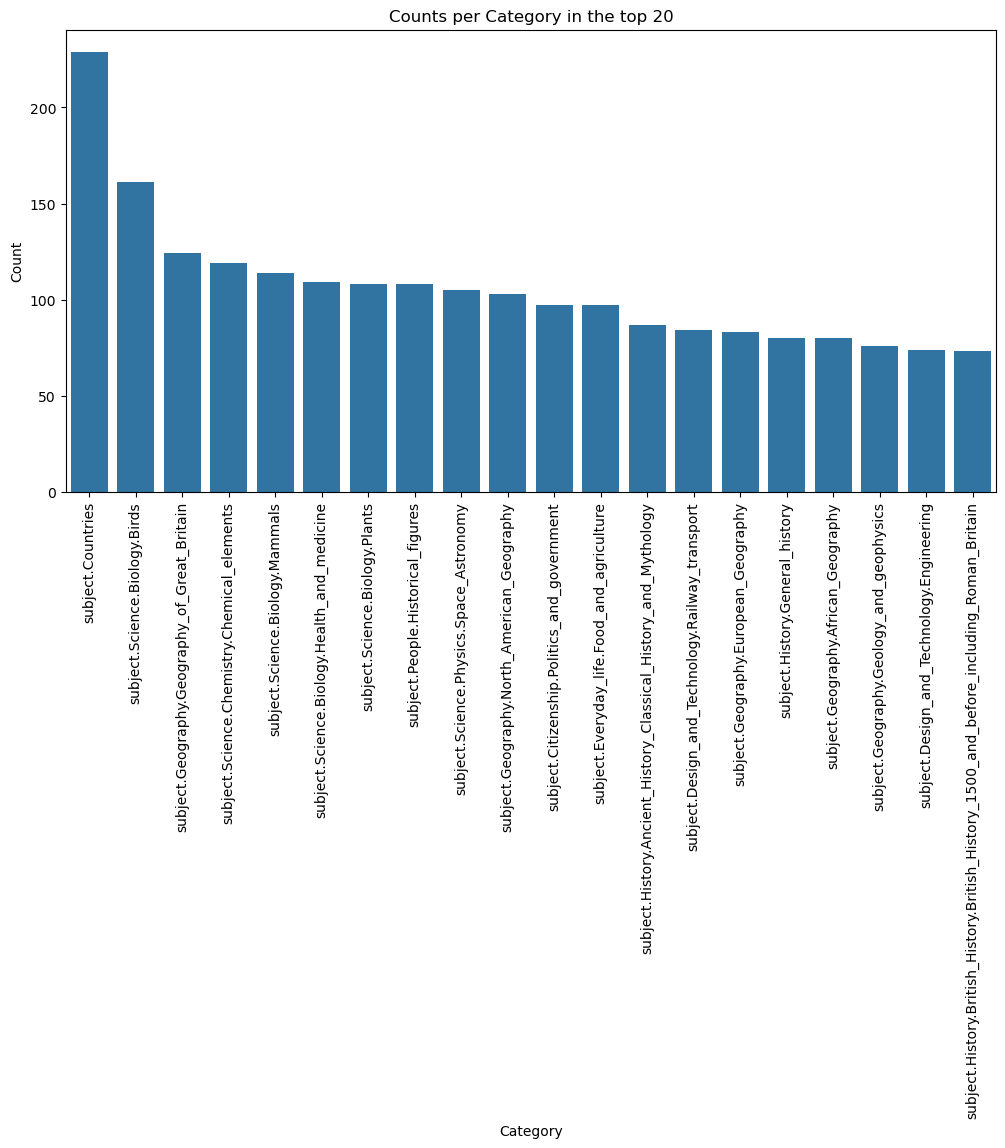

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `article_dataframe` is already loaded and `category` is a list column

# Step 1: Process the `category` column to get counts of each category

# Explode the list of categories into individual rows for counting
categories_exploded = article_dataframe.explode('category')

# Count the frequency of each unique category
category_counts = categories_exploded['category'].value_counts()

top_20_categories = category_counts.head(20)

# Plotting the category distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_categories.index, y=top_20_categories.values)
plt.xticks(rotation=90)
plt.title("Counts per Category in the top 20")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


## Distribution of number of targets per atricle

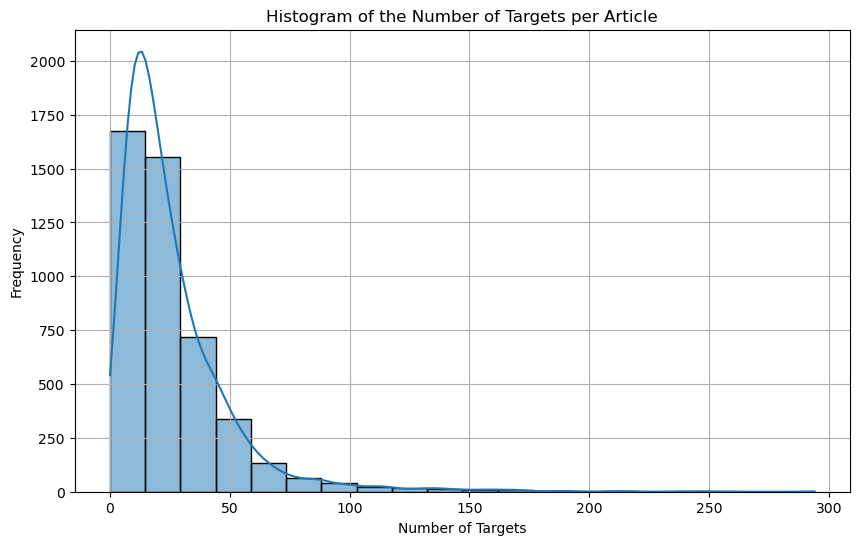

In [62]:
# Replace NaN values with empty lists to avoid errors
article_dataframe['linkTarget'] = article_dataframe['linkTarget'].apply(lambda x: x if isinstance(x, list) else [])

# Count the number of targets (length of the list) for each article
article_dataframe['num_targets'] = article_dataframe['linkTarget'].apply(len)

# Plot the histogram of the number of targets
plt.figure(figsize=(10, 6))
sns.histplot(article_dataframe['num_targets'], bins=20, kde=True)
plt.title("Histogram of the Number of Targets per Article")
plt.xlabel("Number of Targets")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


## what are the most dense articles in term of hyperlinks ?

In [ ]:
## code for hyperlink density, not done yet

## Now we want to know which are the most linked to articles to see if those are coherent with the articles most present in the players games

Top 10 Most Linked-To Articles:
linkTarget
United_States       1551
United_Kingdom       972
France               959
Europe               933
England              751
World_War_II         751
Germany              743
India                611
English_language     598
London               587
Name: count, dtype: int64


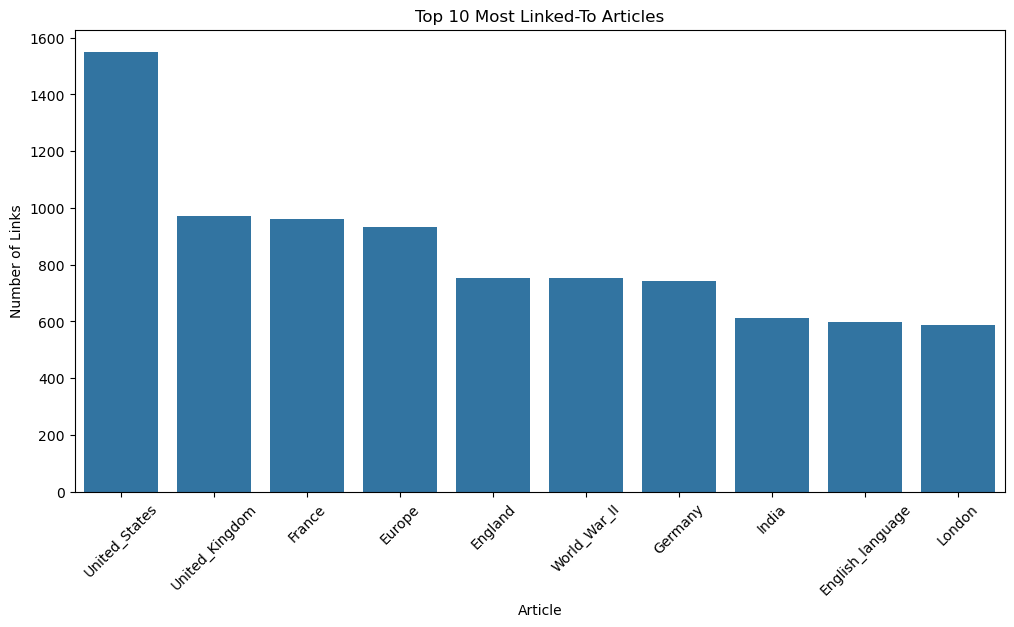

In [64]:
# Flatten the list of all targets by concatenating all linktarget lists
all_targets = article_dataframe['linkTarget'].explode()

# Count the occurrences of each target article
target_counts = all_targets.value_counts()

# Display the top most linked-to articles (e.g., top 10 or top N)
N = 10  # Number of top articles to display
top_linked_articles = target_counts.head(N)

print(f"Top {N} Most Linked-To Articles:")
print(top_linked_articles)

# Bar plot of the top most linked-to articles
plt.figure(figsize=(12, 6))
sns.barplot(x=top_linked_articles.index, y=top_linked_articles.values)
plt.xticks(rotation=45)
plt.title(f"Top {N} Most Linked-To Articles")
plt.xlabel("Article")
plt.ylabel("Number of Links")
plt.show()
